## Prediction Uncertainty with	Bootstrapping

This section is	 the adaptation	 of	 Activity	 2	 from	 KNN	 classification	 to	 KNN regression.	 You use	 the bootstrapping	 technique	 to	 quantify	 the	 uncertainty	 of	predictions	for	the	KNN	regressor

Firstly, the dataset fro this task will be import and explore:

### Import library and explore the dataset

In [1]:
#Library
library(reshape2) #reshaping the data format 
library(ggplot2) #visualising the data

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [2]:
#Import the csv file for this task
train <- read.csv('Task1B_train.csv')
test <- read.csv('Task1B_test.csv')

#Explore the train and test dataset
head(train)
head(test)

x1,x2,x3,x4,y
1991.496,1628.75,1678.1,1772.8,2443.6
1991.504,1606.51,1678.6,1718.0,2448.2
1991.512,1618.16,1686.6,1723.1,2484.7
1991.519,1630.75,1682.9,1734.5,2487.9
1991.527,1635.47,1697.5,1754.0,2510.5
1991.535,1647.84,1723.8,1759.8,2532.5


x1,x2,x3,x4,y
1991.500,1613.63,1688.5,1750.5,2460.2
1991.508,1621.04,1684.1,1708.1,2470.4
1991.515,1610.61,1671.6,1714.3,2466.8
1991.523,1640.17,1703.6,1757.4,2508.4
1991.531,1645.89,1716.3,1754.3,2497.4
1991.538,1638.35,1730.5,1755.5,2556.8


1. Modify	the	code in	Activity2 to	handle	bootstrapping	for	KNN	regression.

This step is done with same process as the modification of knn classifier function to knn regressor. The only difference is that it will be started with buiding a bootstrap function which is a random sampling approach which work by randomly select data point (the same point can be selected) as a new set (Chen,2022). Here is the implementation: 

In [3]:
#Separate the label with the data point of the dataset
train_data = train[1:4]
train_label = train[,5]
test_data = test[1:4]
test_label = test[,5]

# define a function that generates sample indexes based on bootstrap technique
boot <- function (original.size=100, sample.size=original.size, times=100){
    #sample. size= size of dataset generate by bootstrap. times= time dataset generate, 
    indx <- matrix(nrow=times, ncol=sample.size)
    for (t in 1:times){
        indx[t, ] <- sample(x=original.size, size=sample.size, replace = TRUE) #randomly select the sample and 
        #put it back to reselect
    }
    return(indx)
}
# just to see if it works!
boot(100, 10, 5)

76,10,79,8,81,43,6,63,29,59
77,91,21,81,42,81,46,10,83,78
59,33,31,89,22,71,39,34,33,55
22,5,83,47,61,82,4,14,59,85
30,74,60,82,29,95,8,59,51,57


### Bootstrapping with KNN Regressor

2. Load Task1B_train.csv and Task1B_test.csv sets.	 Apply	 your bootstrapping	 for	 KNN	 regression	 with	 times	 =	 100	 (the	 number	 of subsets),	 size	 =	 30 (the	 size	 of	 each	 subset),	 and	 change	 K=1,..,20 (the neighbourhood	size).	Now	create	a	boxplot	where	the	x-axis	is	K,	and	the	yaxis	is	 the	average	error	 (and the	uncertainty	around	it)	corresponding to each	K.	Save	the	plot	in	your	Jupyter	Notebook	file	for	Question	3.

In the begining of this part, the knn regressor will be created as the follow:

In [4]:
#Derieved the KNN function from the tutorial activity 1
# KNN function (distance should be one of euclidean, maximum, manhattan, canberra, binary or minkowski)
knn <- function(train.data, train.label, test.data, K=3, distance = 'euclidean'){
    ## count number of train and test samples
    train.len <- nrow(train.data)
    test.len <- nrow(test.data)
    
    ## calculate distances between samples
    dist <- as.matrix(dist(rbind(test.data, train.data), method= distance))[1:test.len, (test.len+1):(test.len+train.len)]
    
    ## for each test sample...
    for (i in 1:test.len){
        ### ...find its K nearest neighbours from training sample...
        nn <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]
        
        ###... and calculate mean
        test_label[i] <- (mean(train.label[nn]))
    }
    
    ## return the mean as output
    return (test_label)
}

Then, the parameter will be set up using in the boot strap function and storing in a dataframe for the plotting.

In [5]:
# fix the parameters (20,100,30)
K <- 20           # Maximum K for KNN  (neighbourhood size)
L <- 100           # number of datasets (number of subset)
N <- 30          # size of datasets (size of each subset)

# generate bootstrap indices:
boot.indx <- boot(nrow(train_data), N, L)

# a dataframe to track the number of missclassified samples in each case
error <- data.frame('K'=1:K, 'L'=1:L, 'test'=rep(0,L*K))

# THIS MAY TAKE A FEW MINUTES TO COMPLETE
## for every k values:
for (k in 1: K){
    
    ### for every dataset sizes:
    for (l in 1:L){
        
        #### calculate iteration index i
        i <- (k-1)*L+l
        
        #### save sample indices that were selected by bootstrap
        indx <- boot.indx[l,]
        
        #### save the value of k and l
        error[i,'K'] <- k
        error[i,'L'] <- l
        
        #### calculate and record the train and test error rates (MSE error) of training set with bootstrap resampling
        error[i,'test'] <-  sum((knn(train_data[indx, ], train_label[indx], test_data, K=k)-test_label)**2)/nrow(test_data)
    } 
}

In [6]:
#Show the result of error with the number of dataset generating by bootstrap and the time it generate
error

K,L,test
1,1,32266.67
1,2,28894.38
1,3,19702.65
1,4,15331.19
1,5,18875.21
1,6,68089.74
1,7,18422.09
1,8,30193.42
1,9,27142.15
1,10,19563.06


In [7]:
error.m <- melt(error, id=c('K', 'L')) # reshape dataframe for visualization (change form)
names(error.m) <- c('K', 'L', 'type', 'error') #rename the dataframe column for convenience in plot

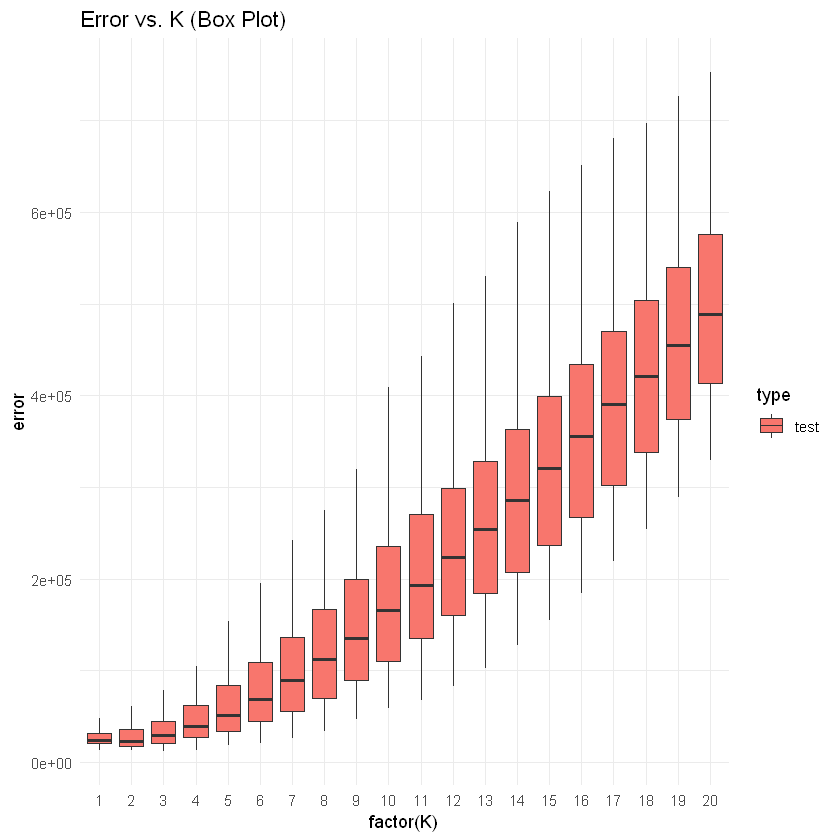

In [8]:
#Boxplot 
ggplot(data=error.m[error.m$type=='test',], aes(factor(K), error,fill=type)) + geom_boxplot(outlier.shape = NA)  + 
    scale_color_discrete(guide = guide_legend(title = NULL)) + 
    ggtitle('Error vs. K (Box Plot)') + theme_minimal()
# ignore the warnings (because of ignoring outliers)
options(warn=-1)

3. Based on the plot in the previous	part	 (Part	П),	how	does	 the	 test	error	and	 its	 uncertainty	 behave	as	 K	 increases? Explain	 in	 your	 Jupyter Notebook	file.

Plotting result:
Once the k value is increased, the error will be increased which is due to decrease in complexity(underfitting). On the other hand, the uncertainty is increased due to an error in prediction once there is more variation of the data point.

4. Load Task1B_train.csv and	 Task1B_test.csv sets.	 Apply	 your bootstrapping	 for	 KNN	 regression	 with	 K=10	 (the	 neighbourhood	 size),	size	=	30 (the	size	of	each	subset),	and	change	 times	=	10,	20,	30,..,	200	(the	number	of	subsets).	Now	create	a	boxplot	where	the	x-axis	is	‘times’, and	 the	 y-axis	 is	 the	 average	 error	 (and	 the	 uncertainty	 around	 it) corresponding	 to	 each	 value	 of	 ‘times’.	 Save	 the plot	 in	 your	 Jupyter Notebook	file	for	Question	3.

The process will be similar to the previous task, but this time we will generate number of bootstrap start from 1..10,1..20....1:200 and see the result of the error

In [9]:
# fix the parameters (10,sequence of 10 to 200 by 10,30)
K <- 10           # Maximum K for KNN  (neighbourhood size)
L <- 200         # number of datasets (number of dataset generate(time))
N <- 30          # size of datasets
i <- 0

# a dataframe to track the number of missclassified samples in each case
error_new <- data.frame('Change_Times', 'L', 'test')

# THIS MAY TAKE A FEW MINUTES TO COMPLETE
#Generate bootstrap by the number sequence of data generating (boot strap of 1:10,1:20...1:200)
for (l in seq(10,L,by=10)){
    # generate bootstrap indices:
    boot.indx <- boot(nrow(train_data), N, l)
    
    ### for every dataset sizes sequence
    for (l2 in 1:l){
    #### calculate iteration index i
        i <- i+1
    #### save sample indices that were selected by bootstrap
        indx <- boot.indx[l2,]
    #### save the value of l and time_change
        error_new[i,'Change_Times'] <- l
        error_new[i,'L'] <-l2
        
    #### calculate and record the train and test missclassification rates
        error_new[i,'test'] <-  sum((knn(train_data[indx,],train_label[indx],test_data,K=K)-test_label)**2)/nrow(test_data)
    } 
}

In [10]:
#Error report for each bootstrap set
error_new[4:6]

Change_Times,L,test
10,1,152645.88
10,2,128854.51
10,3,208427.04
10,4,288441.55
10,5,171438.64
10,6,99664.27
10,7,77859.13
10,8,116747.88
10,9,277237.25
10,10,240801.98


In [11]:
#Change the dataframe format
error_new.m <- melt(error_new[4:6][,-2],id=c('Change_Times'))
names(error_new.m)<- c('L','Type','error')

In [12]:
error_new.m

L,Type,error
10,test,152645.88
10,test,128854.51
10,test,208427.04
10,test,288441.55
10,test,171438.64
10,test,99664.27
10,test,77859.13
10,test,116747.88
10,test,277237.25
10,test,240801.98


### Plot the error vs the number of time bootstrap generate

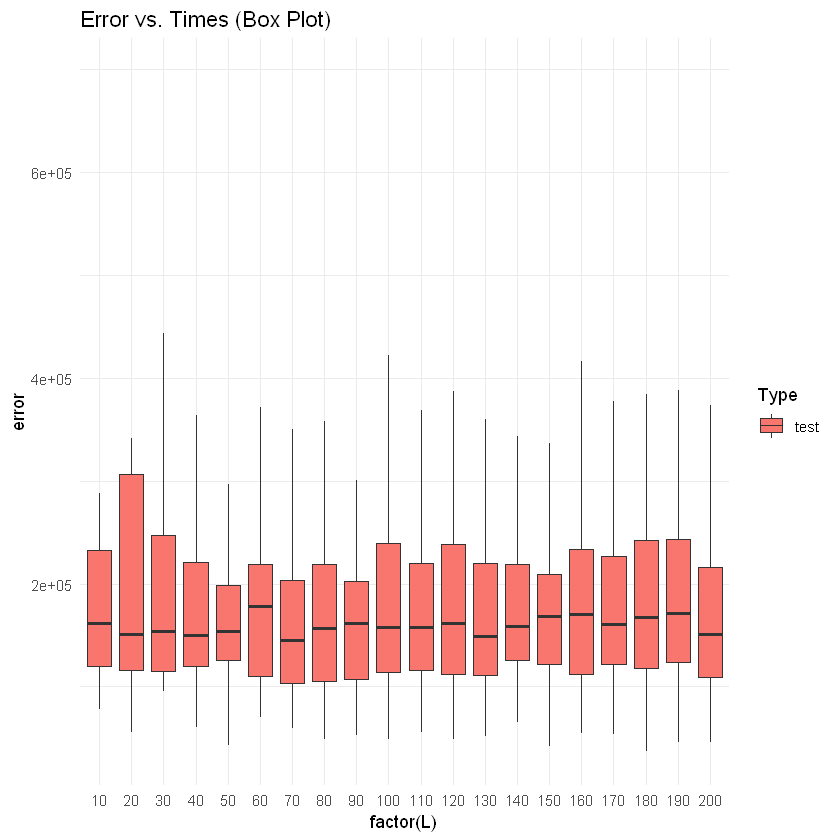

In [13]:
#Plot the graph of error vs how many time dataset generating by boot strap
ggplot(data=error_new.m[error_new.m$Type=='test',], aes(factor(L), error,fill=Type)) + geom_boxplot(outlier.shape = NA)  + 
    scale_color_discrete(guide = guide_legend(title = NULL)) + 
    ggtitle('Error vs. Times (Box Plot)') + theme_minimal()
# ignore the warnings (because of ignoring outliers)
options(warn=-1)

5. Based	on the	plot	in	the	previous	part	(Part	IV),	how	does	the	test	error	and	 its	 uncertainty behave	 as	 the	 number	 of	 subsets	 in	 bootstrapping	increases? Explain	in	your	Jupyter	Notebook	file.

Plotting result:
The error of the testing is not increase that much or decrease, this may be because the datapoint have reach the optimal point of each iteration of all the boot strap set. However, the uncertainty is increased due to a more in variation of data point within each set generating each iteration.

## Reference

All of the code and the algorithm idea is derieved from:

- Chen, B. (2022). $\textit{Week 2.:Elements of Machine Learning}$ \[PowerPoint slides]. https://lms.monash.edu/mod/resource/view.php?id=9894962
- Jupyter Notebooks:FIT5201 Machine Learning, (nd.). $\textit{Activity 1.1 K-nearest neighbour classifier}$. https://lms.monash.edu/mod/resource/view.php?id=10048617
- Jupyter Notebooks:FIT5201 Machine Learning, (nd.). $\textit{Activity 1.2 Bootstrapping}$. https://lms.monash.edu/mod/resource/view.php?id=10048617